# Complex Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

In [2]:
print(tf.__version__)

2.5.0-dev20201211


In [3]:
# X training
f = h5py.File("./X_training.h5","r")
print(f.keys())
train_images = f['training'][:]
f.close()
train_images[np.isnan(train_images)] = 0.

# Y training
f = h5py.File("./Y_training.h5","r")
print(f.keys())
train_labels = f['train_labels'][:].astype(int)
f.close()

# X validation
f = h5py.File("./X_validation.h5","r")
val_images = f['validation'][:]
f.close()
val_images[np.isnan(val_images)] = 0.

# Y validation
f = h5py.File("./Y_validation.h5","r")
val_labels = f['val_labels'][:].astype(int)
f.close()

# X testing
f = h5py.File("./X_testing.h5","r")
test_images = f['testing'][:]
f.close()
test_images[np.isnan(test_images)] = 0.

# Y testing
f = h5py.File("./Y_testing.h5","r")
test_labels = f['test_labels'][:].astype(int)
f.close()


<KeysViewHDF5 ['training']>
<KeysViewHDF5 ['train_labels']>


In [4]:
print(train_images.shape)
print(train_labels.shape)

(183600, 32, 32, 3)
(183600, 1)


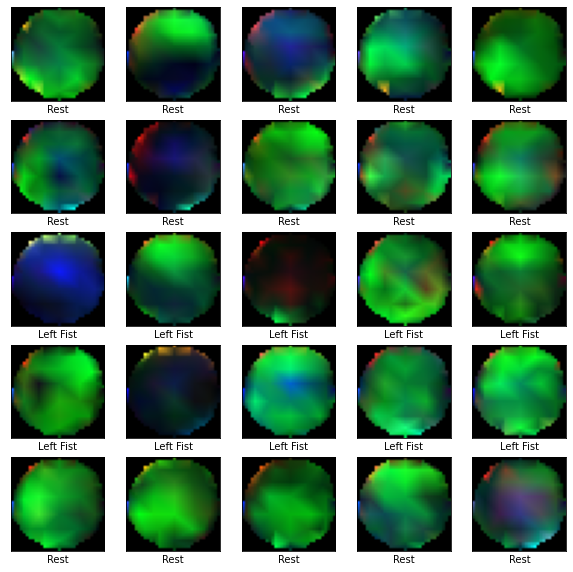

In [5]:
class_names = ['Rest', 'Left Fist', 'Right Fist', 'Both Fists', 'Both Feet']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
# Number of occurences of each class that occur before
a = np.unique(train_labels,return_counts =1, return_index=1, return_inverse = 1)
print(a[3])

print(train_labels[3:13])


[92700 22910 22540 22740 22710]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [7]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

# Reshape the input array
train_images2 = train_images.reshape((183600,1,32,32,3))
val_images2 = val_images.reshape((1800,1,32,32,3))
test_images2 = test_images.reshape((1800,1,32,32,3))

train_labels2 = train_labels[0::1]
val_labels2 = val_labels[0::1]
test_labels2 = test_labels[0::1]


(183600, 32, 32, 3)
(183600, 1)
(1800, 32, 32, 3)
(1800, 1)


# Model

In [8]:
# Simple CNN Network
from tensorflow.keras.layers import TimeDistributed

model = models.Sequential()
model.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu'), input_shape=(1, 32, 32, 3)))
model.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(TimeDistributed(layers.Conv2D(256, (3, 3), activation='relu')))
model.add(TimeDistributed(layers.ReLU()))
model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(TimeDistributed(layers.Flatten()))
model.add(layers.LSTM(256))
model.add(layers.Dense(5, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 30, 30, 64)     1792      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 28, 28, 64)     36928     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 26, 26, 64)     36928     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 13, 13, 64)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 11, 11, 128)    73856     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 9, 9, 128)      147584    
_________________________________________________________________
time_distributed_6 (TimeDist (None, 1, 4, 4, 128)      0

In [11]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images2, train_labels2, epochs=1, batch_size = 16,
                    validation_data=(val_images2, val_labels2), shuffle=False)

print("\n")
# Predict on the test images
predictions = model.predict(test_images2)
# Print our model's predictions.
predicts = np.argmax(predictions, axis=1)
print(predicts[0:40]) 
print("\n")
# Check our predictions against the ground truths.
print(test_labels2[0:40].flatten())

print("\n")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
print("\n")
test_loss, test_acc = model.evaluate(test_images2,  test_labels2, verbose=2)

print("\n")
print(test_acc)
print("\n")

# Number of occurences of each class that occur before
b = np.unique(predicts,return_counts =1, return_index=1, return_inverse = 1)
print(b[0])
print(b[3])

C:\Users\Alkinoos\anaconda3\envs\NEW\lib\site-packages\tensorflow\python\keras\backend.py:5008: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


  347/11475 [..............................] - ETA: 23:33 - loss: 1.3818 - accuracy: 0.5029

KeyboardInterrupt: 

In [12]:
# Save the model
model.save("model_original.h5")

In [15]:
model = tf.keras.models.load_model("model_original.h5")

In [ ]:
# STM32 CUBEAI - TFLITE MICRO AND GAP8 (ONLY QUANT_MODEL)
model = tf.keras.models.load_model("model_original.h5")
# TFLite Section
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([1,1,32,32,3], model.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_lstm"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)

quantize = False
if (quantize):
    def representative_dataset():
        for i in range(500):
            yield([train_images[i].reshape(1,32,32,3)])
    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
#converter.representative_dataset = representative_dataset

tflite_model = converter.convert()

tflite_model_name = 'quant_model_original'
open(tflite_model_name + '.tflite', 'wb').write(tflite_model)


# .h FILE
# This function here takes in the model and outputs a header file we will import into the TFLite example project folder. (/Core/Inc/)
# Function: Convert some hex value into an array for C programming

def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str


c_model_name = 'MFCC'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))
    

tflite_interpreter = tf.lite.Interpreter(model_path=tflite_model_name + '.tflite')
tflite_interpreter.allocate_tensors()
input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])


INFO:tensorflow:Assets written to: keras_lstm\assets


INFO:tensorflow:Assets written to: keras_lstm\assets


In [12]:
# TEST
# Run the model with TensorFlow to get expected results.
TEST_CASES = 10

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for i in range(TEST_CASES):
  expected = model.predict(test_images2[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], test_images2[i:i+1, :, :])
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  # Assert if the result of TFLite model is consistent with the TF model.
  np.testing.assert_almost_equal(expected, result)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

  # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
  # the states.
  # Clean up internal states.
  interpreter.reset_all_variables()

ValueError: Cannot set tensor: Got value of type FLOAT32 but expected type INT8 for input 0, name: serving_default_x:0_int8 